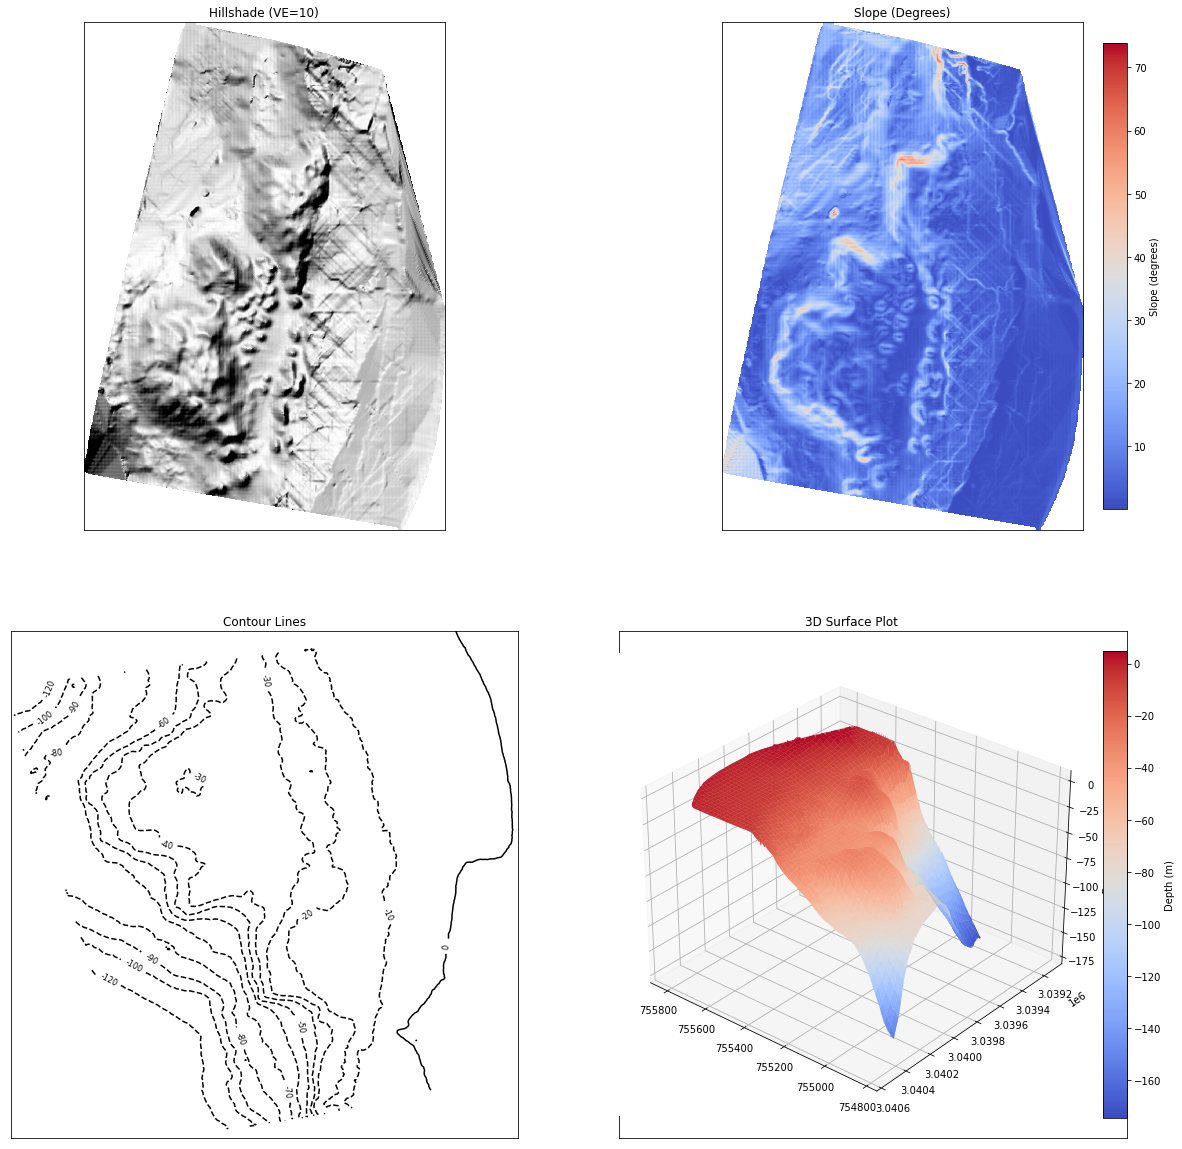

In [11]:
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource
import numpy as np
import pandas as pd
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D

# Load data from CSV file
csv_file = 'elevation_data.csv'
df = pd.read_csv(csv_file)

# Assuming dx and dy values
dx = (max(df['X'].values) - min(df['X'].values)) / 500
dy = (max(df['Y'].values) - min(df['Y'].values)) / 500

# Create a regular grid using interpolation
x = df['X'].values
y = df['Y'].values
z = df['Elevation'].values
xi = np.linspace(min(x), max(x), 500)
yi = np.linspace(min(y), max(y), 500)
xi, yi = np.meshgrid(xi, yi)
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Calculate slope from elevation data
slope_x, slope_y = np.gradient(zi, dx, dy)
slope_radians = np.arctan(np.sqrt(slope_x**2 + slope_y**2))
slope_degrees = np.degrees(slope_radians)

# Shade from the northwest, with the sun 45 degrees from horizontal
ls = LightSource(azdeg=315, altdeg=45)

# Set up subplots for each vertical exaggeration value
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))  # Larger size for better visibility
plt.setp(axs.flat, xticks=[], yticks=[])

# Show the hillshade intensity image for VE=10 in the first subplot
hillshade_img = ls.hillshade(zi, vert_exag=10, dx=dx, dy=dy)
axs[0, 0].imshow(hillshade_img, cmap='gray', extent=[min(x), max(x), min(y), max(y)])
axs[0, 0].set_title('Hillshade (VE=10)')

# Show the slope plot in the second subplot (in degrees)
slope_plot = axs[0, 1].imshow(slope_degrees, cmap='coolwarm', extent=[min(x), max(x), min(y), max(y)])
axs[0, 1].set_title('Slope (Degrees)')

# Add colorbar for the slope plot
cbar_slope = plt.colorbar(slope_plot, ax=axs[0, 1], orientation='vertical', fraction=0.046, pad=0.04)
cbar_slope.set_label('Slope (degrees)')

# Add contour lines to the third subplot
contour_levels = [-120, -100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0]
contour_plot = axs[1, 0].contour(xi, yi, zi, levels=sorted(contour_levels), colors='black')
axs[1, 0].clabel(contour_plot, inline=True, fontsize=8, fmt='%1.0f')
axs[1, 0].set_title('Contour Lines')

# Show the 3D surface plot in the last subplot with larger size
ax_3d = fig.add_subplot(2, 2, 4, projection='3d', frame_on=True)
ax_3d.grid(True)
ax_3d.plot_surface(xi, yi, zi, cmap='coolwarm', rstride=1, cstride=1, antialiased=True, alpha=0.6)

# Add colorbar for the 3D surface plot
cbar_3d = fig.colorbar(ax_3d.plot_surface(xi, yi, zi, cmap='coolwarm'), ax=ax_3d, orientation='vertical', fraction=0.046, pad=0.04)
cbar_3d.set_label('Depth (m)')

ax_3d.set_title('3D Surface Plot', pad=28)
ax_3d.set_zlabel('Depth (m)')  # Add Z-axis label

# Adjust the viewing angle
ax_3d.view_init(azim=130)

# Adjust the position of the title on top of the subplots
fig.subplots_adjust(top=0.9)

plt.savefig('Data Visualization w Python.jpg', format='jpeg', dpi=300)

# Display the plots
plt.show()


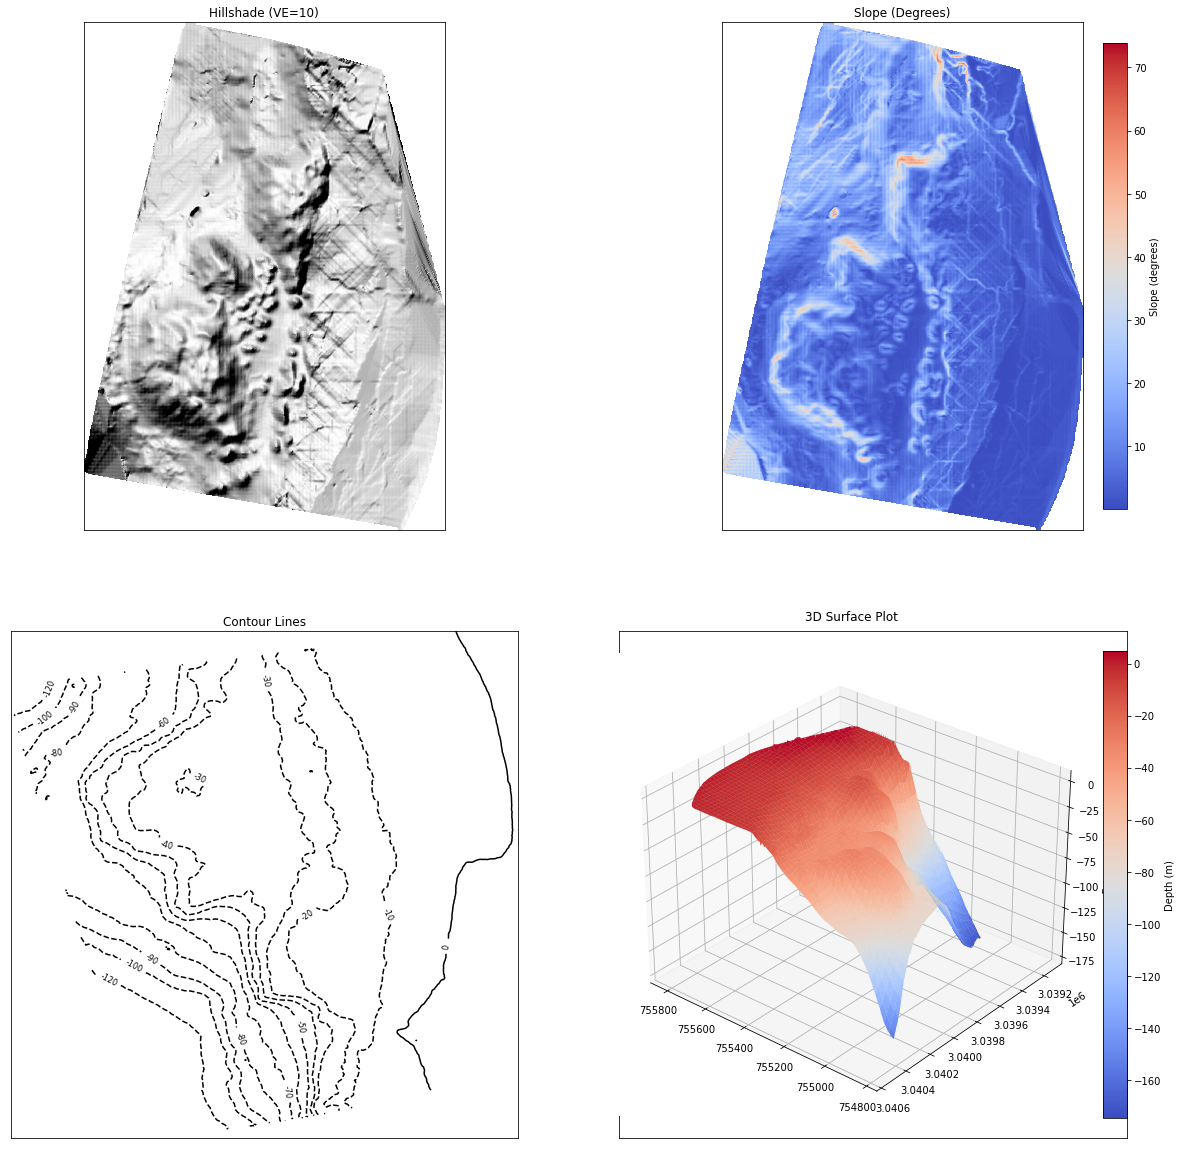

In [12]:
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource
import numpy as np
import pandas as pd
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D

def create_geographic_visualization(csv_file, output_filename='output_plot.jpg', dpi=300):
    # Load data from CSV file
    df = pd.read_csv(csv_file)

    # Assuming dx and dy values
    dx = (max(df['X'].values) - min(df['X'].values)) / 500
    dy = (max(df['Y'].values) - min(df['Y'].values)) / 500

    # Create a regular grid using interpolation
    x = df['X'].values
    y = df['Y'].values
    z = df['Elevation'].values
    xi = np.linspace(min(x), max(x), 500)
    yi = np.linspace(min(y), max(y), 500)
    xi, yi = np.meshgrid(xi, yi)
    zi = griddata((x, y), z, (xi, yi), method='cubic')

    # Calculate slope from elevation data
    slope_x, slope_y = np.gradient(zi, dx, dy)
    slope_radians = np.arctan(np.sqrt(slope_x**2 + slope_y**2))
    slope_degrees = np.degrees(slope_radians)

    # Shade from the northwest, with the sun 45 degrees from horizontal
    ls = LightSource(azdeg=315, altdeg=45)

    # Set up subplots for each vertical exaggeration value
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))  # Larger size for better visibility
    plt.setp(axs.flat, xticks=[], yticks=[])

    # Show the hillshade intensity image for VE=10 in the first subplot
    hillshade_img = ls.hillshade(zi, vert_exag=10, dx=dx, dy=dy)
    axs[0, 0].imshow(hillshade_img, cmap='gray', extent=[min(x), max(x), min(y), max(y)])
    axs[0, 0].set_title('Hillshade (VE=10)')

    # Show the slope plot in the second subplot (in degrees)
    slope_plot = axs[0, 1].imshow(slope_degrees, cmap='coolwarm', extent=[min(x), max(x), min(y), max(y)])
    axs[0, 1].set_title('Slope (Degrees)')

    # Add colorbar for the slope plot
    cbar_slope = plt.colorbar(slope_plot, ax=axs[0, 1], orientation='vertical', fraction=0.046, pad=0.04)
    cbar_slope.set_label('Slope (degrees)')

    # Add contour lines to the third subplot
    contour_levels = [-120, -100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0]
    contour_plot = axs[1, 0].contour(xi, yi, zi, levels=sorted(contour_levels), colors='black')
    axs[1, 0].clabel(contour_plot, inline=True, fontsize=8, fmt='%1.0f')
    axs[1, 0].set_title('Contour Lines')

    # Show the 3D surface plot in the last subplot with larger size
    ax_3d = fig.add_subplot(2, 2, 4, projection='3d', frame_on=True)
    ax_3d.grid(True)
    ax_3d.plot_surface(xi, yi, zi, cmap='coolwarm', rstride=1, cstride=1, antialiased=True, alpha=0.6)

    # Add colorbar for the 3D surface plot
    cbar_3d = fig.colorbar(ax_3d.plot_surface(xi, yi, zi, cmap='coolwarm'), ax=ax_3d, orientation='vertical', fraction=0.046, pad=0.04)
    cbar_3d.set_label('Depth (m)')

    ax_3d.set_title('3D Surface Plot', pad=33)
    ax_3d.set_zlabel('Depth (m)')  # Add Z-axis label

    # Adjust the viewing angle
    ax_3d.view_init(azim=130)

    # Adjust the position of the title on top of the subplots
    fig.subplots_adjust(top=0.9)

    # Save the figure with higher resolution
    plt.savefig(output_filename, format='jpeg', dpi=dpi)

    # Display the plots
    plt.show()

# Example usage:
create_geographic_visualization('elevation_data.csv', 'output_plot.jpg', dpi=300)


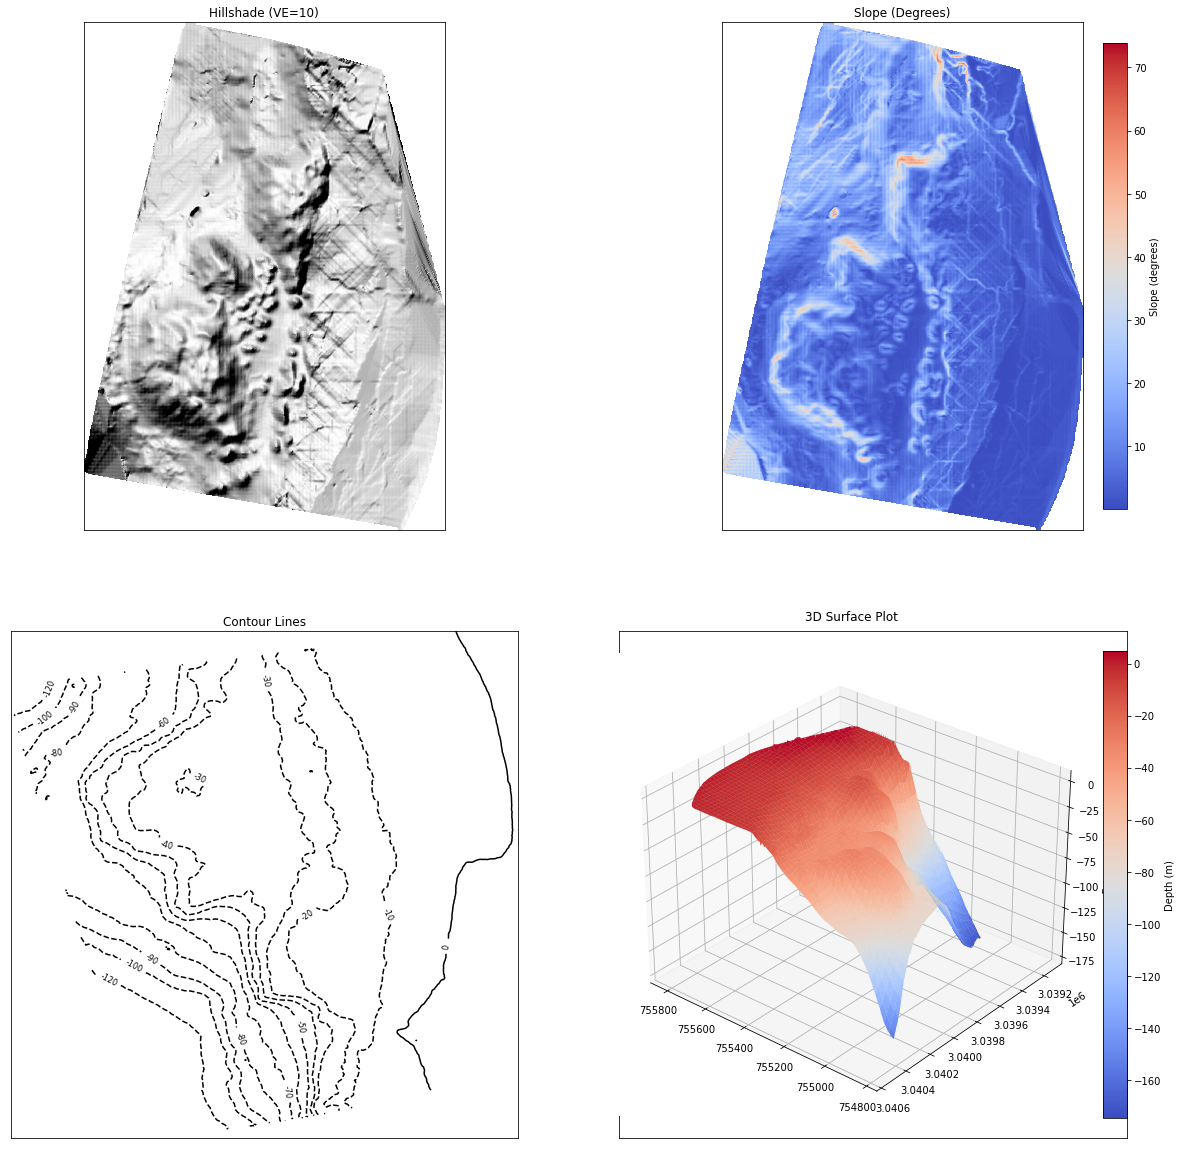

KeyboardInterrupt: 

In [17]:
# Windows App
import tkinter as tk
from tkinter import filedialog, messagebox
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
import os
import pandas as pd
import numpy as np
from scipy.interpolate import griddata
from matplotlib.colors import LightSource
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def create_geographic_visualization(csv_file, output_folder, output_filename='output_plot.jpg', dpi=300):
    # Load data from CSV file
    df = pd.read_csv(csv_file)

    # Assuming dx and dy values
    dx = (max(df['X'].values) - min(df['X'].values)) / 500
    dy = (max(df['Y'].values) - min(df['Y'].values)) / 500

    # Create a regular grid using interpolation
    x = df['X'].values
    y = df['Y'].values
    z = df['Elevation'].values
    xi = np.linspace(min(x), max(x), 500)
    yi = np.linspace(min(y), max(y), 500)
    xi, yi = np.meshgrid(xi, yi)
    zi = griddata((x, y), z, (xi, yi), method='cubic')

    # Calculate slope from elevation data
    slope_x, slope_y = np.gradient(zi, dx, dy)
    slope_radians = np.arctan(np.sqrt(slope_x**2 + slope_y**2))
    slope_degrees = np.degrees(slope_radians)

    # Shade from the northwest, with the sun 45 degrees from horizontal
    ls = LightSource(azdeg=315, altdeg=45)

    # Set up subplots for each vertical exaggeration value
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))  # Larger size for better visibility
    plt.setp(axs.flat, xticks=[], yticks=[])

    # Show the hillshade intensity image for VE=10 in the first subplot
    hillshade_img = ls.hillshade(zi, vert_exag=10, dx=dx, dy=dy)
    axs[0, 0].imshow(hillshade_img, cmap='gray', extent=[min(x), max(x), min(y), max(y)])
    axs[0, 0].set_title('Hillshade (VE=10)')

    # Show the slope plot in the second subplot (in degrees)
    slope_plot = axs[0, 1].imshow(slope_degrees, cmap='coolwarm', extent=[min(x), max(x), min(y), max(y)])
    axs[0, 1].set_title('Slope (Degrees)')

    # Add colorbar for the slope plot
    cbar_slope = plt.colorbar(slope_plot, ax=axs[0, 1], orientation='vertical', fraction=0.046, pad=0.04)
    cbar_slope.set_label('Slope (degrees)')

    # Add contour lines to the third subplot
    contour_levels = [-120, -100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0]
    contour_plot = axs[1, 0].contour(xi, yi, zi, levels=sorted(contour_levels), colors='black')
    axs[1, 0].clabel(contour_plot, inline=True, fontsize=8, fmt='%1.0f')
    axs[1, 0].set_title('Contour Lines')

    # Show the 3D surface plot in the last subplot with larger size
    ax_3d = fig.add_subplot(2, 2, 4, projection='3d', frame_on=True)
    ax_3d.grid(True)
    ax_3d.plot_surface(xi, yi, zi, cmap='coolwarm', rstride=1, cstride=1, antialiased=True, alpha=0.6)

    # Add colorbar for the 3D surface plot
    cbar_3d = fig.colorbar(ax_3d.plot_surface(xi, yi, zi, cmap='coolwarm'), ax=ax_3d, orientation='vertical', fraction=0.046, pad=0.04)
    cbar_3d.set_label('Depth (m)')

    ax_3d.set_title('3D Surface Plot', pad=33)
    ax_3d.set_zlabel('Depth (m)')  # Add Z-axis label

    # Adjust the viewing angle
    ax_3d.view_init(azim=130)

    # Adjust the position of the title on top of the subplots
    fig.subplots_adjust(top=0.9)

    # Save the figure with higher resolution to the specified output folder
    output_path = os.path.join(output_folder, output_filename)
    plt.savefig(output_path, format='jpeg', dpi=dpi)

    # Display the plots
    plt.show()

class GeographicVisualizationApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Geographic Visualization App")

        # CSV file path
        self.csv_file_path = None

        # Output folder path
        self.output_folder_path = None

        # Select CSV file button
        self.select_file_button = tk.Button(self.root, text="Select CSV File", command=self.select_csv_file)
        self.select_file_button.pack(pady=10)

        # Select output folder button
        self.select_output_folder_button = tk.Button(self.root, text="Select Output Folder", command=self.select_output_folder)
        self.select_output_folder_button.pack(pady=10)

        # Button to run the visualization function
        self.run_button = tk.Button(self.root, text="Run Visualization", state=tk.DISABLED, command=self.run_visualization)
        self.run_button.pack(pady=10)

    def select_csv_file(self):
        file_path = filedialog.askopenfilename(filetypes=[("CSV files", "*.csv")])
        if file_path:
            self.csv_file_path = file_path
            self.run_button.config(state=tk.NORMAL)

    def select_output_folder(self):
        folder_path = filedialog.askdirectory()
        if folder_path:
            self.output_folder_path = folder_path

    def run_visualization(self):
        if self.csv_file_path and self.output_folder_path:
            # Run your visualization function
            output_filename = 'output_plot.jpg'
            create_geographic_visualization(self.csv_file_path, self.output_folder_path, output_filename)

            # Display a message that the visualization is complete
            tk.messagebox.showinfo("Complete", "Geographic Visualization is complete!\nSaved as {}".format(output_filename))
        else:
            tk.messagebox.showwarning("Warning", "Please select a CSV file and an output folder first.")

# Create the main Tkinter window
root = tk.Tk()
app = GeographicVisualizationApp(root)

# Run the Tkinter event loop
root.mainloop()
